# Aufgabe 31: Data Mining Anwendung – Energie Rekonstruktion

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import h5py
import pandas as pd

/home/jannis/.local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Teilaufgabe a)

In [2]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5') # loading the data

df = df[df.corsika_run_header_particle_id == 1]
df = df[df.corsika_event_header_total_energy > 500]
df.corsika_event_header_total_energy = np.log10(df.corsika_event_header_total_energy) 
# Das ist sinnvoll, weil energy und charges unterschiedliche Größenordnungen haben.
# Dann wird energy nicht überbewertet.

size = np.asarray(df['size'])
width = np.asarray(df.width)
length = np.asarray(df.length)
num_pixel_in_shower = np.asarray(df.num_pixel_in_shower)
photoncharge_shower_mean = np.asarray(df.photoncharge_shower_mean)
X = np.vstack((size, width, length, num_pixel_in_shower, photoncharge_shower_mean)).T
y = np.asarray(df.corsika_event_header_total_energy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Teilaufgabe b)

In [3]:
# Ich habe nicht wirklich eine Ahnung wie man die Parameter am besten wählen sollte
forest = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

## Teilaufgabe c)

In [4]:
def evaluate_performance(y_true, y_pred):
    # So wie in der Aufgabe angegeben erst mal paar Sachen berechnen
    delta_y = y_true - y_pred
    mean_delta_y = np.mean(delta_y)
    sigma_delta_y = np.std(delta_y, ddof = 1)
    mean_y_true = np.mean(y_true)
    sigma_y_true = np.std(y_true)
    print('Mittelwert von delta y: ', mean_delta_y)
    print('Standardabweichung von delta y: ', sigma_delta_y)
    print('Standardabweichung der wahren Energien: ', sigma_y_true)
    plt.hist(delta_y, bins = 100, range = (mean_delta_y - 3*sigma_delta_y, mean_delta_y + 3*sigma_delta_y))
    plt.ylabel(r'counts')
    plt.xlabel(r'Residuen $\Delta y$:')
    plt.show()
    plt.clf()
    plt.hexbin(y_pred, y_true, mincnt=1)
    cb = plt.colorbar()
    plt.xlabel(r'geschätzte Energien $y_{pred}$')
    plt.ylabel(r'wahre Energien $y_{true}$')
    plt.show()
    plt.clf()

Mittelwert von delta y:  -0.005195222720511943
Standardabweichung von delta y:  0.2102382387479246
Standardabweichung der wahren Energien:  0.32890903560801343


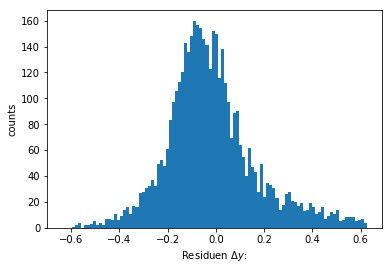

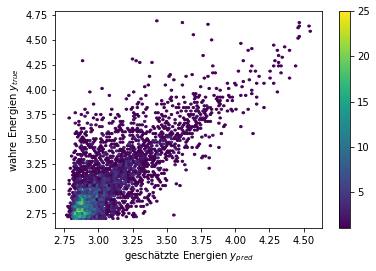

<Figure size 432x288 with 0 Axes>

In [5]:
forest = RandomForestRegressor(n_estimators = 1000, max_depth = 20, random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
evaluate_performance(y_test, y_pred)


Bei einem perfekter Schätzer wäre jede geschätzte Energie die wahre Energie.
Alle Residuen wären gleich 0, das Histogramm würde also nur noch aus einem bin bei bestehen.
Die Standardabweichung der Residuen wäre auch 0.
Im Korrelationsplot würden alle Punkte auf der Winkelhalbierenden liegen und nicht mehr streuen.

## Teilaufgabe d)

In [6]:
with h5py.File("smd_deeplearning_gammas_reduced.hdf5", "r") as f:
    
    energy = f['energy'][:]
    
    charges = f['charges'][:]


#print(charges) # Warum sind das nans? So kann ich leider nicht arbeiten ...

energy = np.log10(energy)
print(energy)
print(charges)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

[[3.4806309]
 [3.247861 ]
 [2.8291261]
 ...
 [3.0449438]
 [2.875997 ]
 [3.270904 ]]
[[[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  ...

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  ...

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]

  [[nan]
   [nan